# Employee Rentention 

## 1. Define The Problem
### a. To identify the employee turnover indicators
### b.  To predict who is going to leave

For the last 3 months I have been coordinating the temporary staffing activities at my place of work. Its been an exciting project with alot to learn and a chance to explore different approaches towards making the process flawless. Just like any other staffing function my goal has been to realise an efficient way to acquire right employees and retaining them through their assignment. 

Though the the datasets provided may not compare apple to apple with my organisation's, the approach towards finding the answers would pretty much be the same 


# 2. Discover  

In [1]:
#Import the Libraries
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
#Import the data
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


No missing data hence no "missing data" cleanning needed  
14999 entries

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


left is our target 

In [6]:
# Visualize
import matplotlib.pyplot as plt

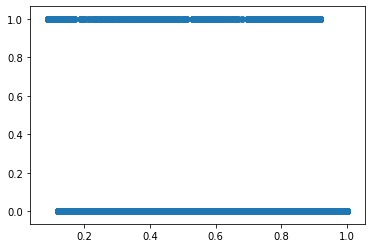

In [13]:
plt. scatter(df.satisfaction_level, df.left)

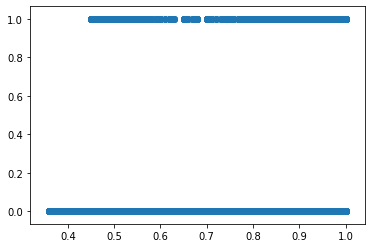

In [14]:
plt. scatter(df.last_evaluation, df.left)

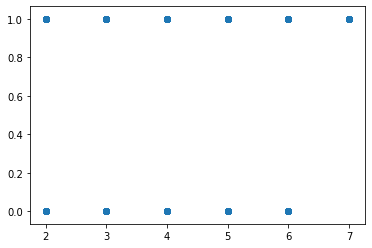

In [12]:

plt. scatter(df.number_project, df.left)

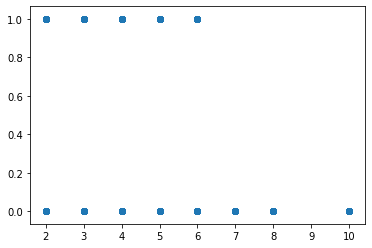

In [16]:

plt. scatter(df.time_spend_company, df.left)

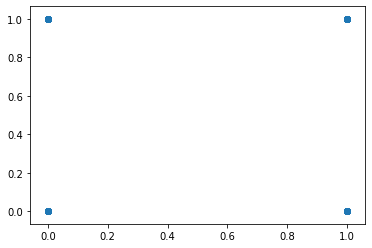

In [17]:
plt. scatter(df.promotion_last_5years, df.left)

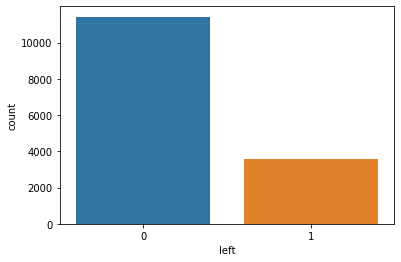

In [18]:
sns.countplot(df['left'])

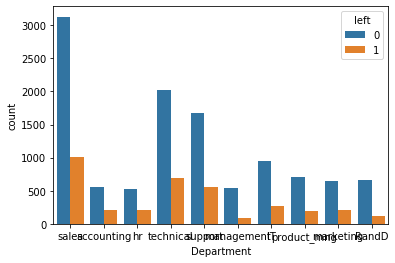

In [22]:
sns.countplot(df['Department'], hue=df['left'])       

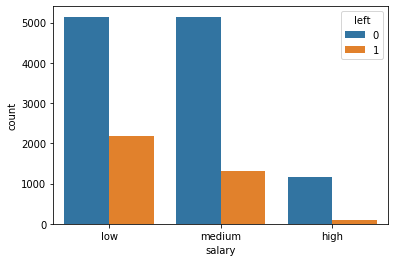

In [24]:
sns.countplot(df['salary'], hue=df['left']) 

This is what we can tell from the data so far-
There is a higher number of employees that stayed than left. 
Sales has the highest pop and also the highest turnover.
There is some form of relationship between left with - department, satisfaction level,satisfaction_level	last_evaluation	number_project	average_monthly_hours	time_spend_company	Work_accident

I think we should use all the features to train our model depending on the performance we can evaluate.

# 3. Create Training and Testing Dataset

In [23]:
#import train_test_split from sklearn 

from sklearn.model_selection import train_test_split

In [25]:
# convert the department, Salary data into categorical data
# get dummiess

departments = pd.get_dummies(df.Department)


In [26]:
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [29]:
salaries = pd.get_dummies(df.salary)

In [30]:
salaries.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [31]:

df = df.drop("Department", axis=1)
df = df.join(departments)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0


In [32]:
df = df.drop("salary", axis=1)
df = df.join(salaries)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
x = df.drop("left", axis=1)
y = df.left

In [34]:
# randomly split the training data to test the model 80:20

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=23)

## Predict with Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# Fit logistic regression model
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model = logistic_model.fit(x_train, y_train)

/Users/richardmiriti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
y_pred = logistic_model.predict(x_test)

In [56]:
# Accuracy of the model

logistic_model.score(x_test,y_test)



0.7546666666666667